## Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

## Activation Function

In [63]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

## Generalised MLP

In [64]:
# m input neurons,
# n hidden neurons and
# o output neurond

class MLP:
    def __init__(self, m, n, o, train_inputs, train_outputs):
        # Set the number of input, hidden, and output neurons
        self.m = m
        self.n = n
        self.o = o

        # Create random weights for the input and hidden layers
        self.w2 = np.random.randn(self.n, self.m)
        self.w3 = np.random.randn(self.o, self.n)

        # Create random biases for the input and hidden layers
        self.b2 = np.random.randn(self.n, 1)
        self.b3 = np.random.randn(self.o, 1)

        # Store the training inputs and outputs
        self.train_inputs = train_inputs
        self.train_outputs = train_outputs

    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):            
            a1 = x.reshape(x.size, 1)              
            z2 = self.w2.dot(a1) + self.b2   
            a2 = sigm(z2)                    
            
            z3 = self.w3.dot(a2) + self.b3   
            a3 = sigm(z3) 
            
            delta3 = (a3 - (y.reshape(y.size, 1)) ) * sigm_deriv(z3)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))
       
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)

            cost += ((a3 - (y.reshape(y.size, 1)) )**2).sum() 
        
        n = len(ys)  # number of training vectors    
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def predict(self, inputs):
        hidden_outputs = sigm(self.w2.dot(inputs.T) + self.b2)
        final_outputs = sigm(self.w3.dot(hidden_outputs) + self.b3)
        return final_outputs[0][0]

    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2, d_w2, d_b3, d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

## Question 1



before:
[[0.45597017 0.55933283 0.47959138 0.59135968]]

after:
[[0.0271864  0.97745197 0.96764502 0.0315652 ]]


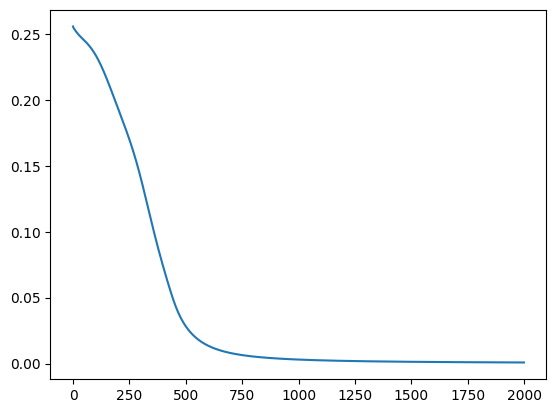

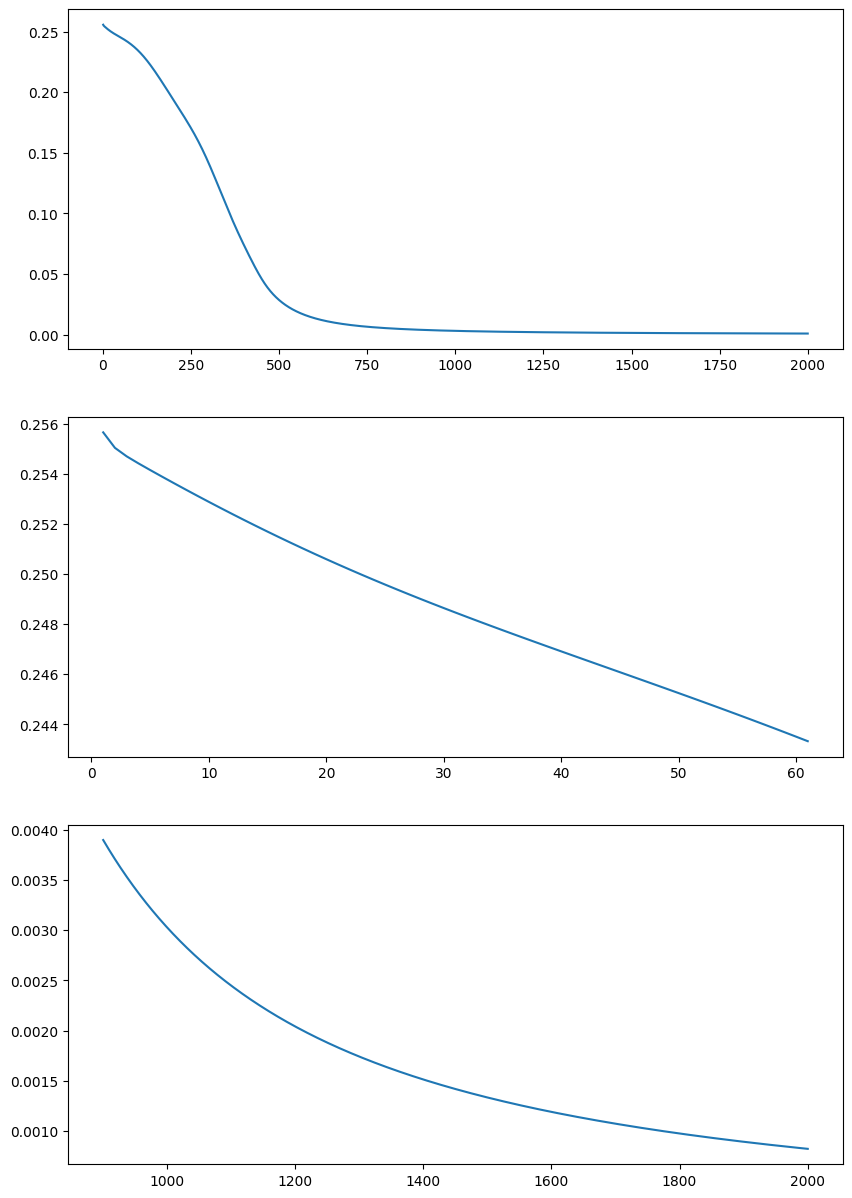

In [65]:
# Set the number of input, hidden, and output neurons
m = 3
n = 4
o = 1

# iterations and eta
epochs = 2000
learning_rate = 3

# Create the training inputs and outputs
train_inputs = np.array([[0,0,1],
                         [0,1,1],
                         [1,0,1],
                         [1,1,1]])

train_outputs = np.array([[0],
                          [1],
                          [1],
                          [0]])

# Create an instance of the MLP class with the given number of neurons and training inputs and outputs
q1 = MLP(m, n, o, train_inputs, train_outputs)

# Transpose of inputs
xs = q1.train_inputs.T

# training
before_train = q1.feedforward(xs)
cost = q1.train(epochs, learning_rate)
after_train = q1.feedforward(xs)

# showing results
print(f"\n\nbefore:\n{before_train}\n\nafter:\n{after_train}")

# showing cost function
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(x_axis, cost)

plt.subplot(3,1,2)
plt.plot(x_axis[:61], cost[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], cost[900:])

## Question 2



before:
[[0.73417175 0.85058902 0.71181154 0.78384077 0.735911   0.83821044
  0.71986278]
 [0.96670595 0.98990576 0.976274   0.99170426 0.9680768  0.99072525
  0.96778137]]

after:
[[0.97444866 0.04357897 0.99931719 0.99995126 0.97376897 0.96038075
  0.99873086]
 [0.05832748 0.98963188 0.95261985 0.05611626 0.03156831 0.96972777
  0.94478403]]


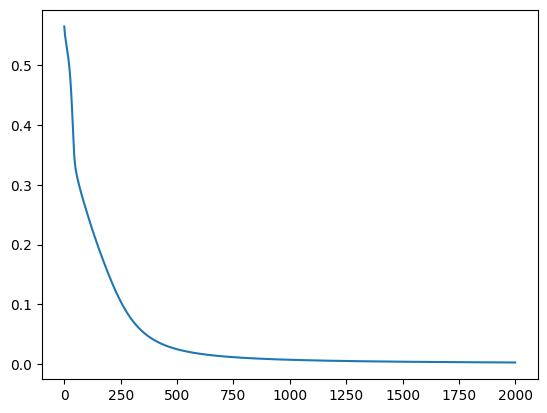

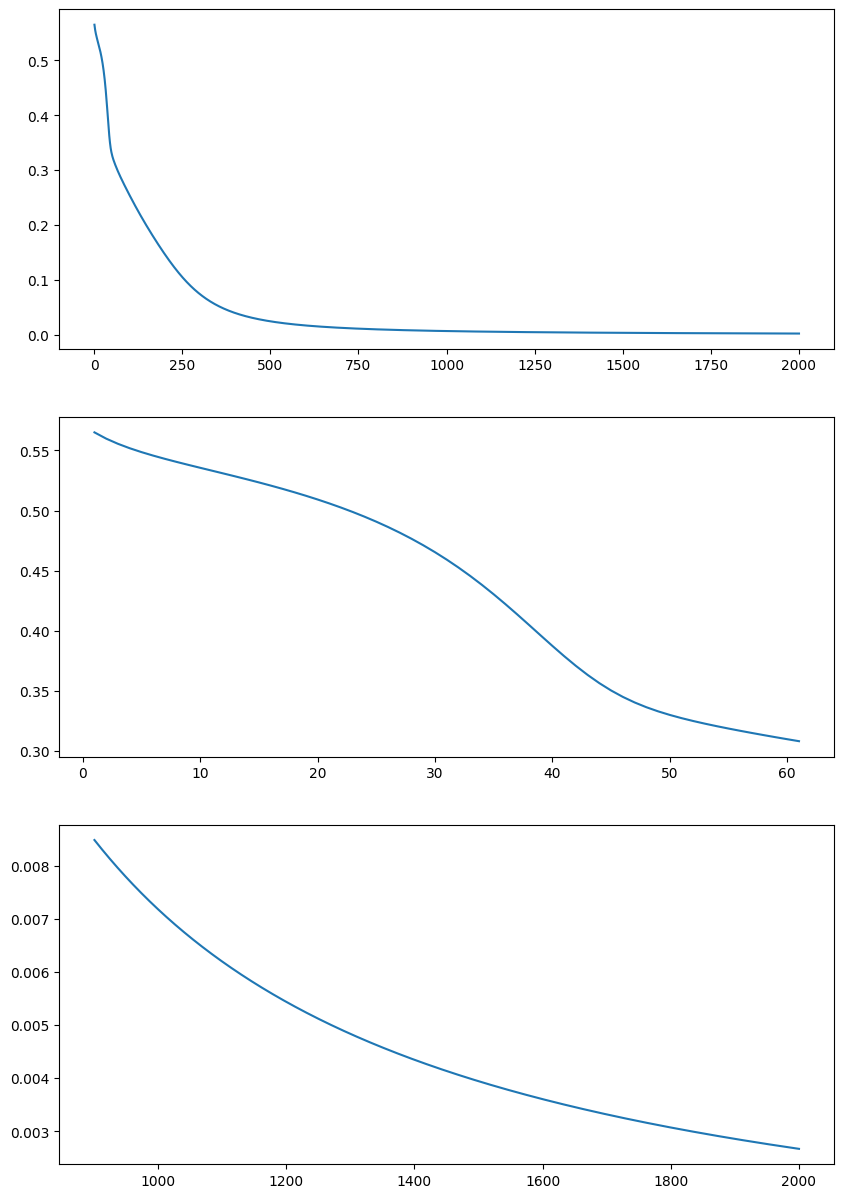

In [66]:
# Set the number of input, hidden, and output neurons
m = 3
n = 5
o = 2

# iterations and eta
epochs = 2000
learning_rate = 2

# Create the training inputs and outputs
train_inputs = np.array([[1, 1, 0],
                         [1,-1,-1],
                         [-1,1, 1],
                         [-1,-1,1],
                         [0, 1,-1],
                         [0,-1,-1],
                         [1, 1, 1]])

train_outputs = np.array([[1, 0],
                          [0, 1],
                          [1, 1],
                          [1, 0],
                          [1, 0],
                          [1, 1],
                          [1, 1]])

# Create an instance of the MLP class with the given number of neurons and training inputs and outputs
q2 = MLP(m, n, o, train_inputs, train_outputs)

# Transpose of inputs
xs = q2.train_inputs.T

# training
before_train = q2.feedforward(xs)
cost = q2.train(epochs, learning_rate)
after_train = q2.feedforward(xs)

# showing results
print(f"\n\nbefore:\n{before_train}\n\nafter:\n{after_train}")

# showing cost function
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(x_axis, cost)

plt.subplot(3,1,2)
plt.plot(x_axis[:61], cost[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], cost[900:])

## Question 3

In [67]:
#creating df and converting the df to floats that correspond to the orignal value
transport_df = pd.read_csv("transport.csv")

# display(transport_df)

transport_df.loc[transport_df["gender"] == "male", "gender"] = 1
transport_df.loc[transport_df["gender"] == "female", "gender"] = 0

transport_df.loc[transport_df["car_ownership"] == 1, "car_ownership"] = 0.5
transport_df.loc[transport_df["car_ownership"] == 2, "car_ownership"] = 1

transport_df.loc[transport_df["travel_cost"] == "cheap", "travel_cost"] = 0
transport_df.loc[transport_df["travel_cost"] == "standard", "travel_cost"] = 0.5
transport_df.loc[transport_df["travel_cost"] == "expensive", "travel_cost"] = 1

transport_df.loc[transport_df["income_level"] == "low", "income_level"] = 0
transport_df.loc[transport_df["income_level"] == "medium", "income_level"] = 0.5
transport_df.loc[transport_df["income_level"] == "high", "income_level"] = 1

transport_df.loc[transport_df["transportation_mode"] == "bus", "transportation_mode"] = 0
transport_df.loc[transport_df["transportation_mode"] == "train", "transportation_mode"] = 0.5
transport_df.loc[transport_df["transportation_mode"] == "car", "transportation_mode"] = 1

transport_df = transport_df.apply(pd.to_numeric, errors="coerce")

print("\nTransport CSV with corresponding numbers:")
display(transport_df)



Transport CSV with corresponding numbers:


,gender,car_ownership,travel_cost,income_level,transportation_mode
0,1,0.0,0.0,0.0,0.0
1,1,0.5,0.0,0.5,0.0
2,0,0.5,0.0,0.5,0.5
3,0,0.0,0.0,0.0,0.0
4,1,0.5,0.0,0.5,0.0
5,1,0.0,0.5,0.5,0.5
6,0,0.5,0.5,0.5,0.5
7,0,0.5,1.0,1.0,1.0
8,1,1.0,1.0,0.5,1.0
9,0,1.0,1.0,1.0,1.0



before:
[[0.15064126 0.14433698 0.18713739 0.20081618 0.14433698 0.13678044
  0.20188526 0.19144163 0.17393446 0.21547574]]

after:
[[0.00449994 0.06151721 0.40504426 0.06280986 0.06151721 0.48238325
  0.60085973 0.95708659 0.92797767 0.95386076]]

predict inputs: [[0.  0.  1.  0.5]]
prediction: 0.7918630845636774
transport mode: Car


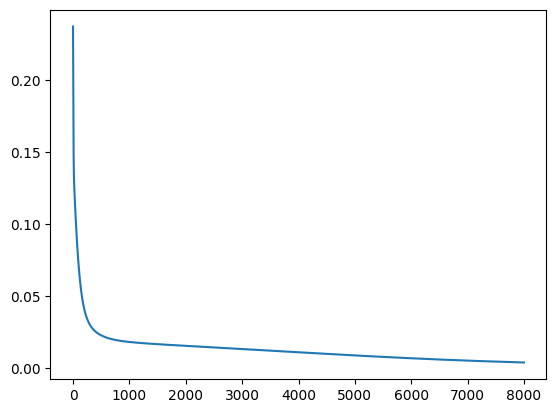

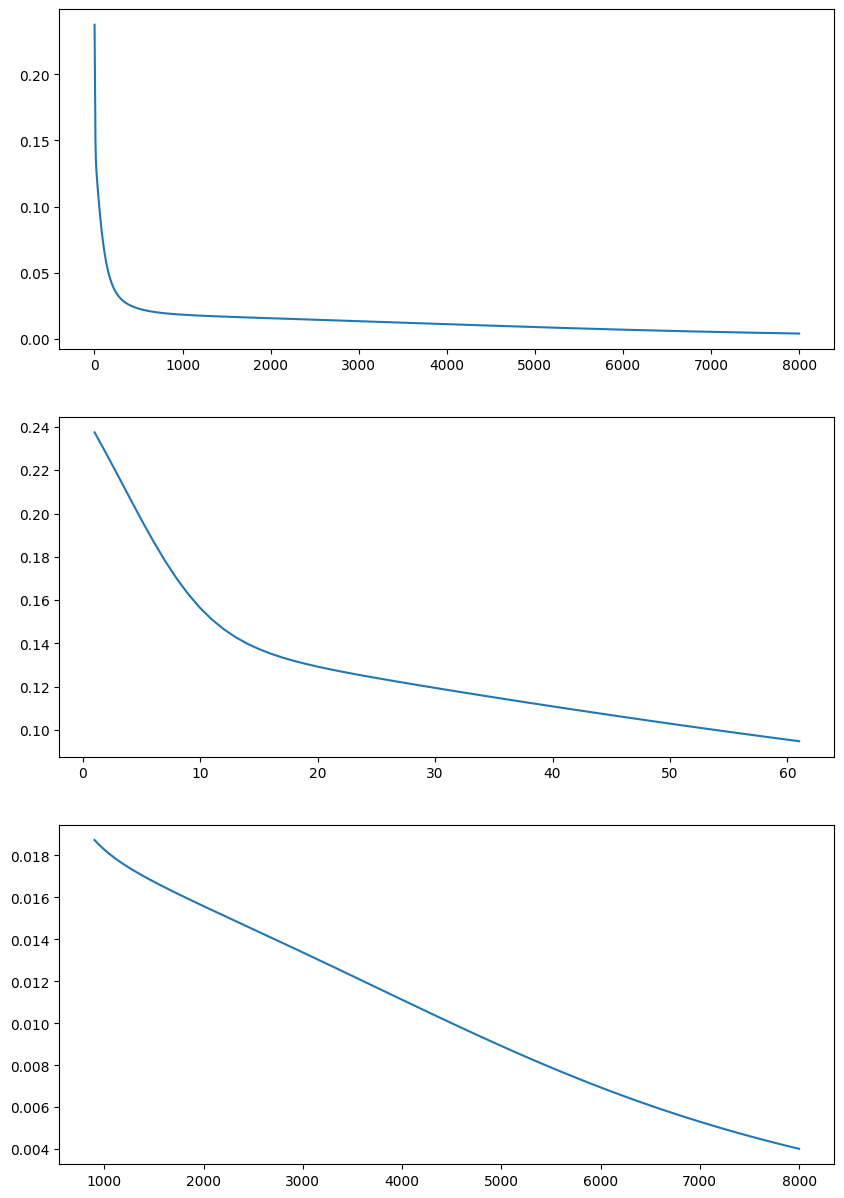

In [68]:
# Set the number of input, hidden, and output neurons
m = 4
n = 6
o = 1

# iterations and eta
epochs = 8000
learning_rate = 0.7

# Create the training inputs and outputs
train_inputs = np.array([[1, 0, 0, 0],
                         [1, 0.5, 0, 0.5],
                         [0, 0.5, 0, 0.5],
                         [0, 0, 0, 0],
                         [1, 0.5, 0, 0.5],
                         [1, 0, 0.5, 0.5],
                         [0, 0.5, 0.5, 0.5],
                         [0, 0.5, 1, 1],
                         [1, 1, 1, 0.5],
                         [0, 1, 1, 1]])

train_outputs = np.array([[0],
                          [0],
                          [0.5],
                          [0],
                          [0],
                          [0.5],
                          [0.5],
                          [1],
                          [1],
                          [1]])

predicton_input = np.array([[0, 0, 1, 0.5]])

# Create an instance of the MLP class with the given number of neurons and training inputs and outputs
q3 = MLP(m, n, o, train_inputs, train_outputs)

# Transpose of inputs
xs = q3.train_inputs.T
before_train = q3.feedforward(xs)
cost = q3.train(epochs, learning_rate)
after_train = q3.feedforward(xs)

#prediction and showing results
print(f"\nbefore:\n{before_train}\n\nafter:\n{after_train}")

tranportation_mode_dict = {
    0 : "Bus",
    0.5 : "Train",
    1 : "Car"
}

predictions = q3.predict(predicton_input)
print(f"\npredict inputs: {predicton_input}")
print(f"prediction: {predictions}")
print(f"transport mode: {tranportation_mode_dict[min(list(tranportation_mode_dict.keys()), key=lambda x:abs(x - predictions))]}")

# showing cost function
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(x_axis, cost)

plt.subplot(3,1,2)
plt.plot(x_axis[:61], cost[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], cost[900:])



## Question 4

In [69]:
#read iris csv and convert species to corresponding numbers for training
iris_df = pd.read_csv("iris_data.csv", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
iris_df.loc[iris_df["species"] == "Iris-setosa", "species"] = 0
iris_df.loc[iris_df["species"] == "Iris-versicolor", "species"] = 0.5
iris_df.loc[iris_df["species"] == "Iris-virginica", "species"] = 1

iris_df = iris_df.apply(pd.to_numeric, errors="coerce")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


Please wait - Training in progress...

before:
[[0.71304642 0.69722953 0.711787   0.69913838 0.71812144 0.7104548
  0.71680534 0.70534335 0.69904493 0.69515474 0.71179215 0.70268836
  0.69741603 0.71901278 0.73370392 0.73604506 0.73177028 0.71394098
  0.70297691 0.72016413 0.69204967 0.71727006 0.74676903 0.69405535
  0.68923413 0.6874869  0.70221369 0.70674736 0.70825617 0.69680738
  0.69241163 0.70278572 0.72858342 0.73461075 0.69515474 0.71348514
  0.71393349 0.69515474 0.70784047 0.70425105 0.72060193 0.68317254
  0.71590535 0.70790163 0.70073357 0.69905691 0.71380486 0.70781879
  0.7129017  0.7067862  0.67866245 0.68270913 0.68372156 0.6805563
  0.68322927 0.68528043 0.68703166 0.67213516 0.67940964 0.68383335
  0.67268742 0.68321811 0.67124993 0.68594411 0.67536103 0.67716636
  0.68844617 0.67462855 0.68436011 0.67524868 0.69202075 0.67549174
  0.687924   0.68337517 0.67693276 0.67812754 0.68204441 0.68853979
  0.68573752 0.66725107 0.67468161 0.67154173 0.6752095  0.691726
  0.6

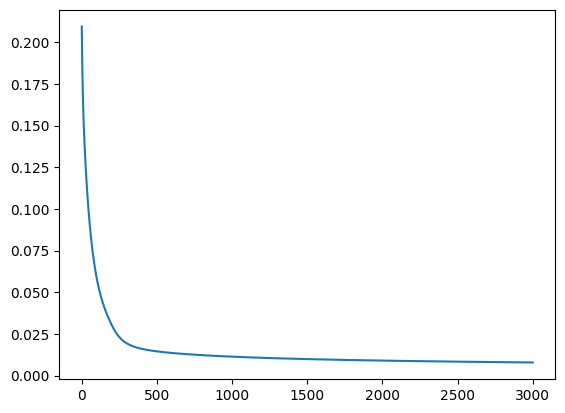

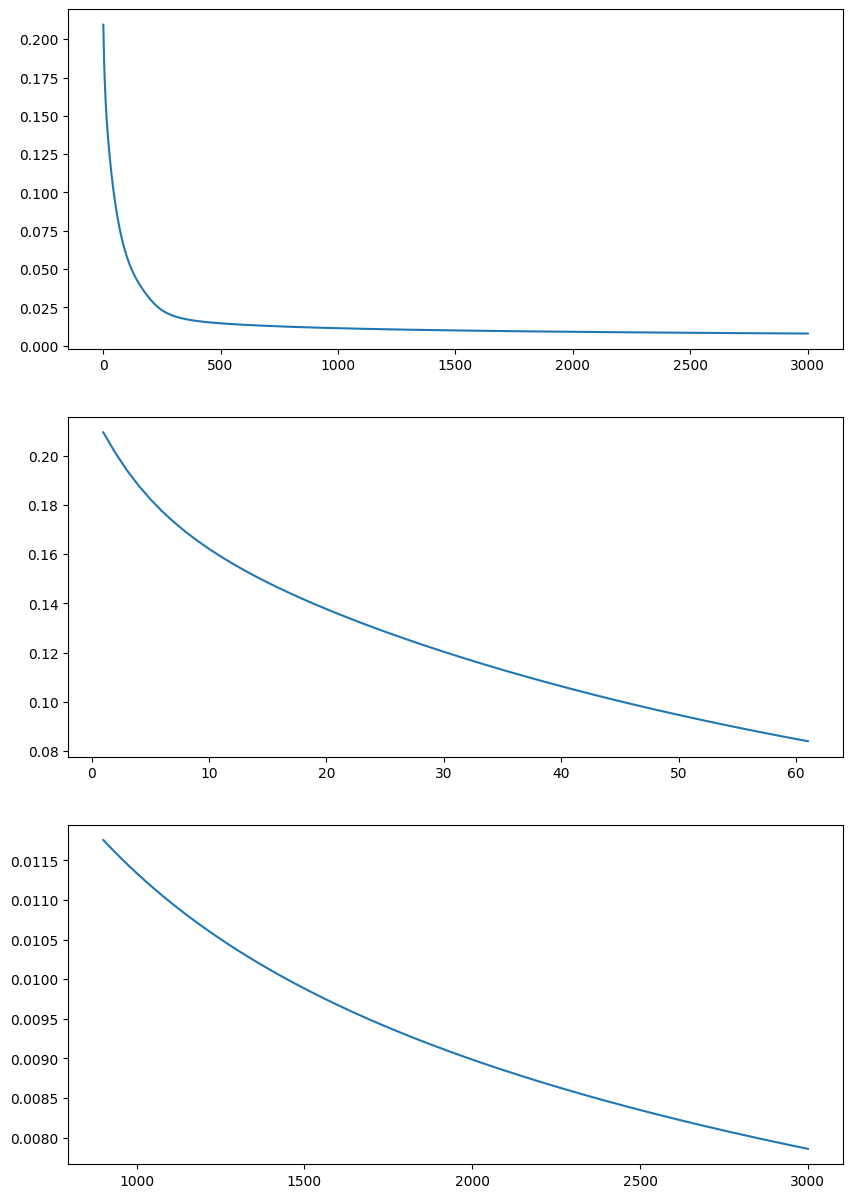

In [70]:
train_outputs = iris_df["species"].to_numpy()
train_inputs = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
predicton_input = np.array([4.6, 3.3, 1.5, 0.2])

# Set the number of input, hidden, and output neurons
m = 4
n = 6
o = 1

# iterations and eta
epochs = 3000
learning_rate = 1

# Create an instance of the MLP class with the given number of neurons and training inputs and outputs
q3 = MLP(m, n, o, train_inputs, train_outputs)

# Transpose of inputs
print("Please wait - Training in progress...")
xs = q3.train_inputs.T
before_train = q3.feedforward(xs)
cost = q3.train(epochs, learning_rate)
after_train = q3.feedforward(xs)

#prediction and showing results
print(f"\nbefore:\n{before_train}\n\nafter:\n{after_train}")

flower_dict = {
    0 : "Iris-setosa",
    0.5 : "Iris-versicolor",
    1 : "Iris-virginica"
}

predictions = q3.predict(predicton_input)
print(f"\npredict inputs: {predicton_input}")
print(f"prediction: {predictions}")

#getting whatever number the predictions variable is closest to in the dict and getting its corresponding value
print(f"flower: {flower_dict[min(list(flower_dict.keys()), key=lambda x:abs(x - predictions))]}")

# showing gradient descent
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(x_axis, cost)

plt.subplot(3,1,2)
plt.plot(x_axis[:61], cost[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], cost[900:])


## Extra Dataset - Wheat Seeds

The seed classification is performed based on 7 physical features: area of wheat, perimeter of wheat, compactness, length of the kernel, width of the kernel, asymmetry coefficient, and kernel groove length.

The dataset is collected from the UCI library and has 200 occurrences of wheat kernels. It contains three distinct types of wheat kernels:

**(Kama, Rosa, Canadian) designated as numerical variables 1, 2 & 3 respectively**.

https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci

In [71]:
seeds_df = pd.read_csv("seeds.csv")
seeds_df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Please wait - Training in progress...

before:
[[0.98804502 0.98798844 0.9882718  0.9882387  0.98793993 0.98819219
  0.9884176  0.98793706 0.98794387 0.98866896 0.98813313 0.98913708
  0.98866279 0.98862173 0.98885824 0.98997055 0.98796471 0.98806246
  0.99033314 0.98846984 0.9883052  0.98793509 0.98858089 0.98804672
  0.98793172 0.9893823  0.9889262  0.9883084  0.98905953 0.98812798
  0.98819145 0.98883133 0.98821807 0.98802908 0.98800618 0.98795156
  0.98819975 0.99156804 0.98837196 0.98828812 0.98852112 0.98838515
  0.98813164 0.98815112 0.98796942 0.98815456 0.98817819 0.98806628
  0.98869038 0.98893409 0.9888205  0.98841611 0.98803261 0.98803346
  0.9882663  0.98797757 0.98800117 0.98893388 0.98968808 0.98966515
  0.98973266 0.9882983  0.98873078 0.98803416 0.98823238 0.98984806
  0.98797896 0.98814053 0.98805507 0.98791429 0.98802614 0.98823216
  0.98800977 0.9879167  0.98795565 0.98795177 0.98833965 0.98799013
  0.98793363 0.98790922 0.98791472 0.98791776 0.98791106 0.98792376
 

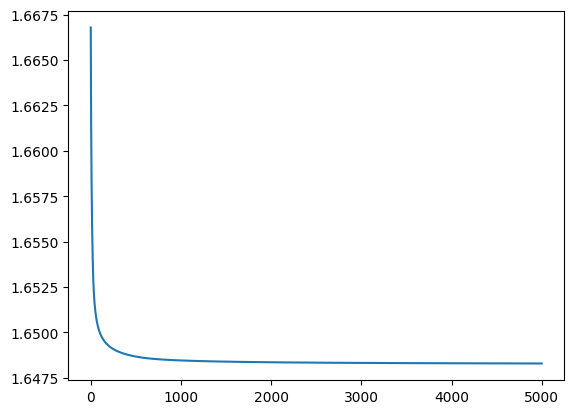

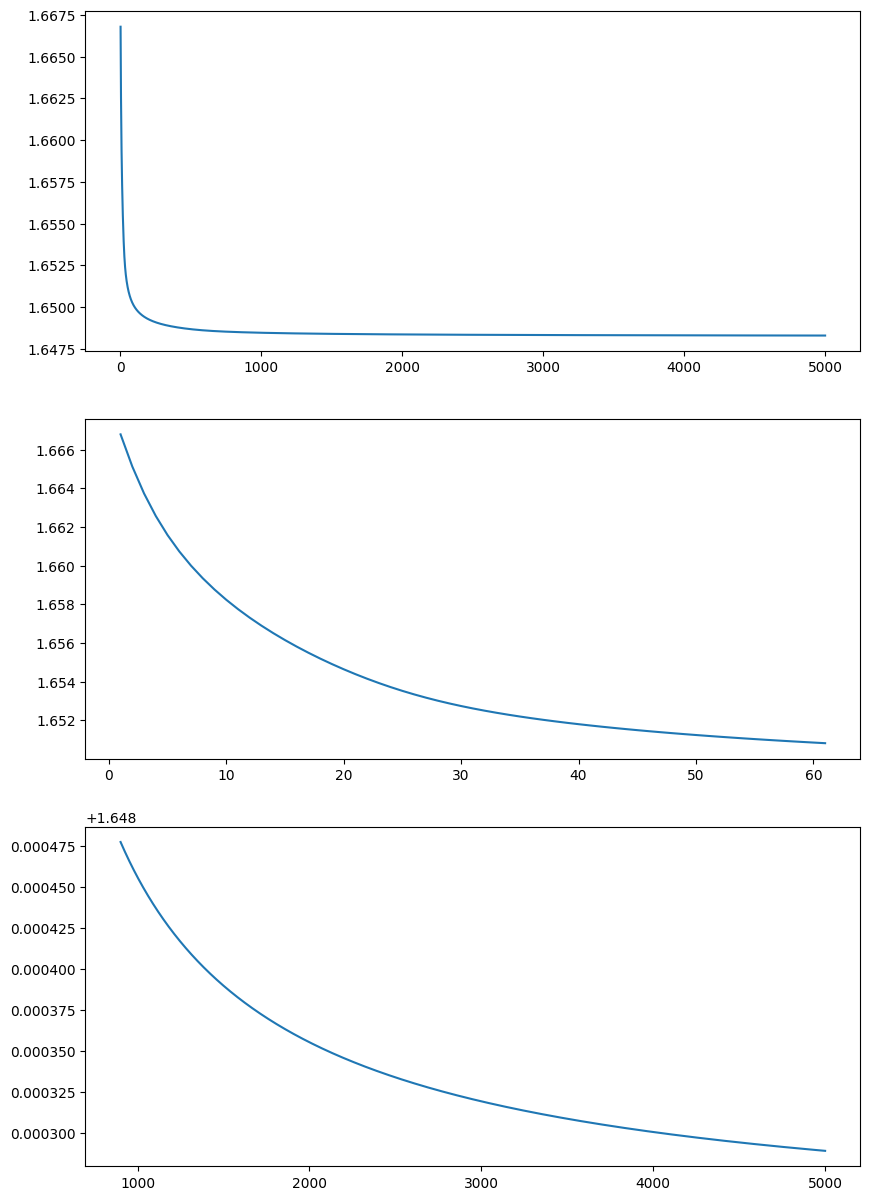

In [74]:
train_outputs = seeds_df["Type"].to_numpy()
train_inputs = seeds_df[["Area", "Perimeter", "Compactness", "Kernel.Length", "Kernel.Width", "Asymmetry.Coeff", "Kernel.Groove"]].to_numpy()
predicton_input = np.array([1.30, 13.34, 0.8684, 5.243, 5.9, 10.637, 5.063])

# Set the number of input, hidden, and output neurons
m = 7
n = 10
o = 1

# iterations and eta
epochs = 5000
learning_rate = 1

# Create an instance of the MLP class with the given number of neurons and training inputs and outputs
q3_seeds = MLP(m, n, o, train_inputs, train_outputs)

# Transpose of inputs
print("Please wait - Training in progress...")
xs = q3_seeds.train_inputs.T
before_train = q3_seeds.feedforward(xs)
cost = q3_seeds.train(epochs, learning_rate)
after_train = q3_seeds.feedforward(xs)

#prediction and showing results
print(f"\nbefore:\n{before_train}\n\nafter:\n{after_train}")

seeds_dict = {
    1 : "Kama",
    2 : "Rosa",
    3 : "Canadian"
}

predictions = q3_seeds.predict(predicton_input)
print(f"\npredict inputs: {predicton_input}")
print(f"prediction: {predictions}")

#getting whatever number the predictions variable is closest to in the dict and getting its corresponding value
print(f"wheat kernel: {seeds_dict[min(list(seeds_dict.keys()), key=lambda x:abs(x - predictions))]}")

# showing gradient descent
x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))

plt.subplot(3,1,1)
plt.plot(x_axis, cost)

plt.subplot(3,1,2)
plt.plot(x_axis[:61], cost[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], cost[900:])